# WM-05: Vector potential and magnetic field in curvilinear coordinates (helix reference curve)

In [1]:
(* In this example properties and relations between vector potential and magnetic field are explored in curvilinear coordinates *)
(* Curvilinear coordinates are constructed using Frenet Serret frame around the reference curve *)
(* The reference curve is chosen to be a helix parameterized by its arc length *)

In [4]:
(* Differential operations in curvilinear coordinates *)

(* Gradient *)
(* Input  : scalar *)
(* Output : covariant vector *)

ClearAll[grad] ;
grad[sqrt_][scalar_, coordinates_] :=  D[scalar, {coordinates}] ;

(* Divergence *)
(* Input  : contravariant vector *)
(* Output : scalar *)

ClearAll[div] ;
div[sqrt_][vector_, coordinates_] := 1/sqrt*Div[sqrt*vector, coordinates] ;

(* Curl *)
(* Input  : covariant vector *)
(* Output : contravariant vector *)

ClearAll[curl] ;
curl[sqrt_][vector_, coordinates_] := 1/sqrt*Curl[vector, coordinates] ;

(* Laplacian *)
(* Input  : scalar *)
(* Output : scalar *)

ClearAll[laplacian] ;
laplacian[sqrt_, inverse_][scalar_, coordinates_] := div[sqrt][inverse . grad[sqrt][scalar, coordinates], coordinates] ;

In [25]:
(* Define field and vector potential in (qx, qy, qz) cartesian coordinates *)
(* Sextupole (cartesian) *)

{aqx, aqy, aqz} = {0, 0, -(kn*(qx^3/3 - qx*qy^2)) - ks*(-(qx^2*qy) + qy^3/3)} ;
{bqx, bqy, bqz} = {2*kn*qx*qy + ks*(qx^2 - qy^2), -2*ks*qx*qy + kn*(qx^2 - qy^2), 0} ;

In [29]:
(* Test *)
(* Note, laplasian of the last vector field component being zero is a special case for this transverse field in cartesian frame *)

Simplify[Div[{bqx, bqy, bqz}, {qx, qy, qz}]]
Simplify[{bqx, bqy, bqz} - Curl[{aqx, aqy, aqz}, {qx, qy, qz}]]
Simplify[Laplacian[Last[{aqx, aqy, aqz}], {qx, qy, qz}]]

0
{0, 0, 0}
0

In [34]:
(* Define the reference curve *)
(* Note, the reference curve should be parameterized by its arclength *)

$Assumptions = {r > 0, r + x > 0, r + y > 0} ;

ClearAll[rx] ;
ClearAll[ry] ;
ClearAll[rz] ;

(* Helix *)

a = b = r ;
rx[s_] := a (1 - Cos[s/Sqrt[a^2 + b^2]])
ry[s_] := a Sin[s/Sqrt[a^2 + b^2]]
rz[s_] := b s /Sqrt[a^2 + b^2]

rxyz = {rx[s], ry[s], rz[s]} ;

rxyz /. s -> 0

{0, 0, 0}

-Graphics3D-
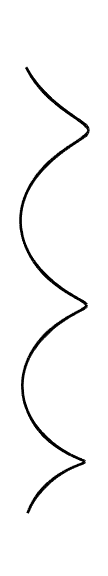

In [47]:
(* Plot *)

ParametricPlot3D[rxyz /. r -> 1, {s, 0, 25}, ImageSize -> Medium, Boxed -> False, Axes -> False, PlotStyle -> Black]

In [49]:
(* Compute Frenet Serret data for the reference curve *)
(* Note, generic curve can be used with FrenetSerretSystem function *)

{{curvature, torsion}, {tangent, normal, binormal}} = Simplify[FrenetSerretSystem[rxyz, s]] ;

(* Accelerator reference frame convension (inward-pointing normal) *)

normal = - normal ;
binormal = Cross[tangent, normal] ;

1     1  1
{---, -(-) -}
 2 r    2  r
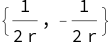

In [55]:
(* Curvature and torsion *)

Simplify[{curvature, torsion}]

In [57]:
(* Coordinates (x, y, s) are contravariant coordinates *)

coordinates = {x, y, s} ;

In [59]:
(* Define radius vector expressed in (x, y, s) curvilinear coordinates *)
(* Coordinates (x, y, s) are contravariant coordinates *)

radius = Simplify[rxyz + x normal + y binormal] ;

(* Covariant basis *)

{ea, eb, ec} = Transpose[D[radius, {coordinates}]] ;

(* Metric tensor *)

forward = Simplify[Outer[Dot, {ea, eb, ec}, {ea, eb, ec}, 1]] ;

(* Metric tensor inverse *)

inverse = Simplify[Inverse[forward]] ;

(* Scaling factor *)

sqrt = Simplify[Sqrt[Det[forward]]] ;

(* Contravariant basis *)

{eA, eB, eC} = Transpose[inverse] . {ea, eb, ec} ;

(* Transformation *)

transform = Thread[{qx, qy, qz} -> radius] ;

(* Construct covariant components *)

{Aa, Ab, Ac} = Simplify[{ea, eb, ec} . {aqx, aqy, aqz} /. transform] ;
{Ba, Bb, Bc} = Simplify[{ea, eb, ec} . {bqx, bqy, bqz} /. transform] ;

(* Construct contravariant components *)

{AA, AB, AC}  = Simplify[Transpose[inverse . {Aa, Ab, Ac}] ] ;
{BA, BB, BC}  = Simplify[Transpose[inverse . {Ba, Bb, Bc}] ] ;

(* Divergence of magnetic field *)

Simplify@PowerExpand@Simplify[div[sqrt][{BA, BB, BC}, coordinates]]

(* Curl of vector potential *)

Simplify@PowerExpand@Simplify[{BA, BB, BC} - curl[sqrt][{Aa, Ab, Ac}, coordinates]]

(* Vector potential gauge *)

Simplify@PowerExpand@Simplify[{BA, BB, BC} - curl[sqrt][{Aa, Ab, Ac} + grad[sqrt][f @@ coordinates, coordinates], coordinates]]

0
{0, 0, 0}
{0, 0, 0}

In [86]:
(* Transformation to cartesian *)

{acx, acy, acz} = Simplify[Dot[{AA, AB, AC}, {ea, eb, ec}]] ;
{bcx, bcy, bcz} = Simplify[Dot[{BA, BB, BC}, {ea, eb, ec}]] ;

In [89]:
(* Compare with initial *)

Simplify[{acx, acy, acz} - {aqx, aqy, aqz} /. transform]
Simplify[{bcx, bcy, bcz} - {bqx, bqy, bqz} /. transform]

{0, 0, 0}
{0, 0, 0}

In [92]:
(* Projections (orthonormal FS basis) *)

{A1, A2, A3} = Simplify[Dot[{normal, binormal, tangent}, {acx, acy, acz}]] ;
{B1, B2, B3} = Simplify[Dot[{normal, binormal, tangent}, {bcx, bcy, bcz}]] ;

Simplify[Total[{aqx, aqy, aqz}^2] - Total[{A1, A2, A3}^2] /. transform]
Simplify[Total[{bqx, bqy, bqz}^2] - Total[{B1, B2, B3}^2] /. transform]

0
0